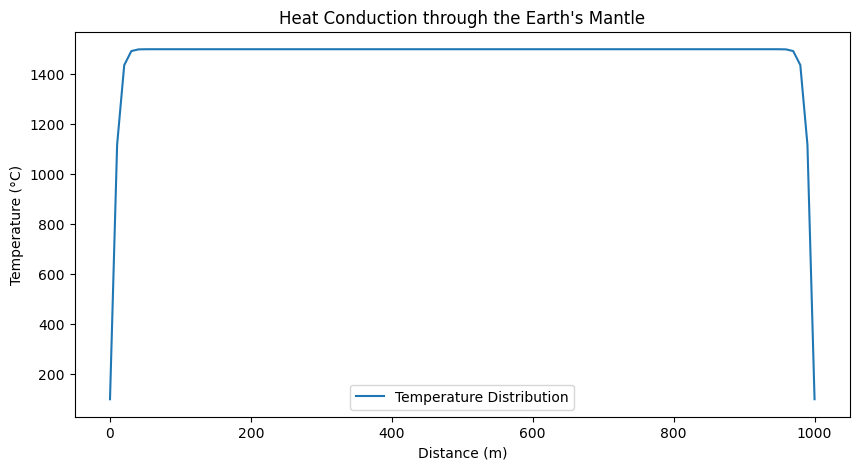

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
thermal_conductivity = 3.5  # W/(m·K)
latent_heat = 1e6  # J/kg
initial_temperature = 1500  # °C
boundary_temperature = 100  # °C
length = 1000  # meters
time_period = 1e7  # seconds

def simulate_heat_conduction(thermal_conductivity, latent_heat, initial_temperature, boundary_temperature, length, time_period, num_points=100):
    # Discretize the space
    x = np.linspace(0, length, num_points)
    dx = x[1] - x[0]
    dt = time_period / 100  # Time step
    alpha = thermal_conductivity / (1000 * 900)  # Assuming density 1000 kg/m³ and specific heat 900 J/(kg·K)
    
    # Initial condition
    temperature = np.ones(num_points) * initial_temperature
    
    # Apply boundary conditions
    temperature[0] = boundary_temperature
    temperature[-1] = boundary_temperature
    
    # Time-stepping
    for _ in range(int(time_period / dt)):
        temperature_new = temperature.copy()
        for i in range(1, num_points - 1):
            temperature_new[i] = temperature[i] + alpha * dt / dx**2 * (temperature[i+1] - 2*temperature[i] + temperature[i-1])
        temperature = temperature_new
    
    return x, temperature

# Simulate heat conduction
x, temperature_distribution = simulate_heat_conduction(
    thermal_conductivity=thermal_conductivity,
    latent_heat=latent_heat,
    initial_temperature=initial_temperature,
    boundary_temperature=boundary_temperature,
    length=length,
    time_period=time_period
)

# Plotting the temperature distribution
plt.figure(figsize=(10, 5))
plt.plot(x, temperature_distribution, label='Temperature Distribution')
plt.xlabel('Distance (m)')
plt.ylabel('Temperature (°C)')
plt.title('Heat Conduction through the Earth\'s Mantle')
plt.legend()
plt.show()

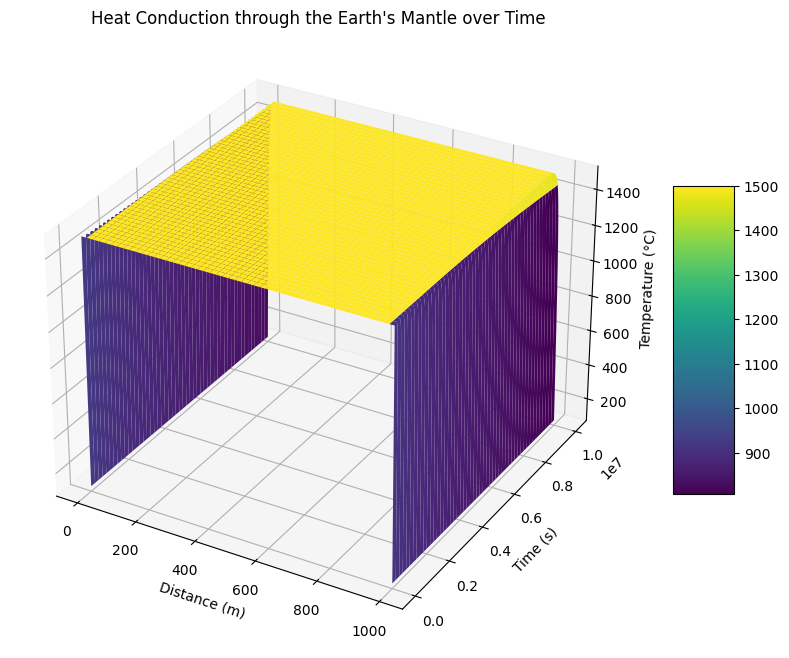

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parameters
thermal_conductivity = 3.5  # W/(m·K)
latent_heat = 1e6  # J/kg
initial_temperature = 1500  # °C
boundary_temperature = 100  # °C
length = 1000  # meters
time_period = 1e7  # seconds
num_points = 500  # Number of spatial data points
num_time_steps = 2000  # Number of time steps

def simulate_heat_conduction_3d(thermal_conductivity, latent_heat, initial_temperature, boundary_temperature, length, time_period, num_points=500, num_time_steps=2000):
    # Discretize the space and time
    x = np.linspace(0, length, num_points)
    dx = x[1] - x[0]
    dt = time_period / (num_time_steps - 1)
    alpha = thermal_conductivity / (1000 * 900)  # Assuming density 1000 kg/m³ and specific heat 900 J/(kg·K)
    
    # Ensure stability: Check if the time step is appropriate
    if dt > dx**2 / (4 * alpha):
        raise ValueError("The time step is too large for stability. Reduce the time step or increase the number of points.")

    # Initialize temperature array
    temperature = np.ones((num_points, num_time_steps)) * initial_temperature
    
    # Apply boundary conditions
    temperature[0, :] = boundary_temperature
    temperature[-1, :] = boundary_temperature
    
    # Time-stepping
    for t in range(1, num_time_steps):
        temperature_new = temperature[:, t-1].copy()
        for i in range(1, num_points - 1):
            temperature_new[i] = temperature[i, t-1] + alpha * dt / dx**2 * (temperature[i+1, t-1] - 2*temperature[i, t-1] + temperature[i-1, t-1])
        temperature[:, t] = temperature_new
    
    return x, np.linspace(0, time_period, num_time_steps), temperature

# Simulate heat conduction
x, time, temperature_distribution = simulate_heat_conduction_3d(
    thermal_conductivity=thermal_conductivity,
    latent_heat=latent_heat,
    initial_temperature=initial_temperature,
    boundary_temperature=boundary_temperature,
    length=length,
    time_period=time_period,
    num_points=num_points,
    num_time_steps=num_time_steps
)

# Plotting the temperature distribution in 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Create a meshgrid for X and Time
X, Time = np.meshgrid(x, time)

# Plot surface
surf = ax.plot_surface(X, Time, temperature_distribution.T, cmap='viridis', edgecolor='none')

# Add color bar for reference
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

# Customize plot
ax.set_xlabel('Distance (m)')
ax.set_ylabel('Time (s)')
ax.set_zlabel('Temperature (°C)')
ax.set_title('Heat Conduction through the Earth\'s Mantle over Time')

# Show plot
plt.show()